# **Survival of the FITtest**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Visualising the results
def plot_model(classifier, X_set, y_set, y_test, y_pred, text):
  from sklearn.metrics import accuracy_score
  print("===== Accuracy Score =====")
  print(accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print("===== Accuracy Score =====")
  class_report = classification_report(y_test, y_pred)
  print(class_report)
  
  from matplotlib.colors import ListedColormap
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('pink', 'cyan')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
  plt.title(text)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

## Get Breast Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
X = data.data
y = data.target

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
# # Applying PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# pca.explained_variance_ratio_


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Feature Importance Decision Trees')

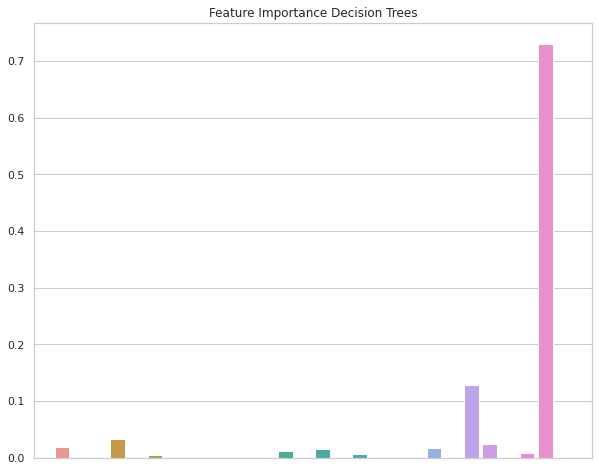

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
importance = classifier.feature_importances_
# summarize importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot importance
fig, ax = plt.subplots(figsize=(10,8))
sns.set_theme(style="whitegrid", palette="pastel")
g = sns.barplot([x for x in range(len(importance))], importance, ax=ax)
g.set_xticklabels([])
g.set_title("Feature Importance Decision Trees")


In [ ]:
type(importance)

numpy.ndarray

In [ ]:
n = 5
indices = (-importance).argsort()[:n]
print(indices)

[27 23  4 21 24]


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
X_train.shape

(512, 30)

In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print(X_train.shape, acc_score)

(512, 30) 0.9122807017543859


In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train[:, indices], y_train)
y_pred = classifier.predict(X_test[:, indices])
acc_score = accuracy_score(y_test, y_pred)
print(X_train[:, indices].shape, acc_score)

(512, 5) 0.8947368421052632
